In [1]:
import ase
import ase.db as db
import ccs_fit
import os

os.chdir("/home/thism292/Documents/repos/CsPbBr3_CCS/CCS_fit_2023/CCS/")

In [2]:
!ase db DFT.db

id|age|user    |formula   |calculator|  energy|natoms| fmax|pbc| volume|charge|    mass| smax
 1| 6h|thism292|Cs4Pb4Br12|vasp      |-714.922|    20|0.014|TTT|800.136| 0.000|2319.270|0.001
 2| 6h|thism292|Cs4Pb4Br12|vasp      |-714.903|    20|0.019|TTT|784.073| 0.000|2319.270|0.002
 3| 6h|thism292|Cs4Pb4Br12|vasp      |-714.835|    20|0.027|TTT|767.733| 0.000|2319.270|0.004
 4| 6h|thism292|Cs4Pb4Br12|vasp      |-714.735|    20|0.011|TTT|751.894| 0.000|2319.270|0.007
 5| 6h|thism292|Cs4Pb4Br12|vasp      |-714.606|    20|0.017|TTT|737.292| 0.000|2319.270|0.009
 6| 6h|thism292|Cs4Pb4Br12|vasp      |-714.434|    20|0.017|TTT|722.525| 0.000|2319.270|0.012
 7| 6h|thism292|Cs4Pb4Br12|vasp      |-714.915|    20|0.014|TTT|802.507| 0.000|2319.270|0.002
 8| 6h|thism292|Cs4Pb4Br12|vasp      |-714.878|    20|0.027|TTT|806.647| 0.000|2319.270|0.004
 9| 6h|thism292|Cs4Pb4Br12|vasp      |-714.823|    20|0.013|TTT|812.580| 0.000|2319.270|0.006
10| 6h|thism292|Cs4Pb4Br12|vasp      |-714.743|    20|0.008|

In [3]:
ccs_fit.ccs_fetch(mode="CCS",DFT_DB="DFT.db",include_forces=True)

    Fetching data: 100%|███████████████████████████████████████| 79/79 [00:00<00:00, 240.17it/s]


In [4]:
### Generate input.json file
import json

input={
    "General": {
        "interface": "CCS",
        "merging"  : "True"
    },
    "Twobody": {
                "Xx-Xx": {
                        "Rcut": 6.0,
                        "Resolution": 0.05,
                        "Swtype": "rep",
                        "const_type" : "Mono"

                },
                "Br-Br": {
                        "Rcut": 6.0,
                        "Resolution": 0.05,
                        "Swtype": "sw",
                        "const_type": "Mono"
                },
                "Pb-Br": {
                        "Rcut": 6.0,
                        "Resolution": 0.05,
                        "Swtype": "sw",
                        "const_type": "Mono"
                },
                "Cs-Br": {
                        "Rcut": 6.0,
                        "Resolution": 0.05,
                        "Swtype": "sw",
                        "const_type": "Mono"
                }
        }
}
#SAVE TO FILE
with open('CCS_input.json', 'w') as f:
    json.dump(input, f, indent=8)

In [5]:
#RUN FIT
from ccs_fit import ccs_fit

ccs_fit("CCS_input.json")

    Generating one-body information from training-set.
        Added elements:  ['Br', 'Cs', 'Pb']
    Generating two-body potentials from one-body information.
    Adding pair: Br-Cs
    Adding pair: Cs-Cs
    Adding pair: Cs-Pb
    Adding pair: Pb-Pb


Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json


    Applying monotonous constraints for pair:  Br-Br
    Applying monotonous constraints for pair:  Pb-Br


Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json


    Applying monotonous constraints for pair:  Br-Cs
    Applying monotonous constraints for pair:  Cs-Cs
    Applying monotonous constraints for pair:  Cs-Pb
    Applying monotonous constraints for pair:  Pb-Pb
    Merging intervall for pair Br-Br. Number of knots reduced from 52 to 48. 
    Merging intervall for pair Pb-Br. Number of knots reduced from 64 to 27. 
    Merging intervall for pair Br-Cs. Number of knots reduced from 68 to 55. 
    Merging intervall for pair Cs-Cs. Number of knots reduced from 36 to 18. 
    Merging intervall for pair Cs-Pb. Number of knots reduced from 35 to 32. 
    Merging intervall for pair Pb-Pb. Number of knots reduced from 41 to 14. 
    There is linear dependence in stochiometry matrix!
    Removing onebody term: Pb
    Condition number is: 1.1004880984378906e+26 ( 195 331052.12524697726 0.0)


    Finding optimum switch: 100%|███████████████████████████| 1296/1296 [00:31<00:00, 41.13it/s]


    The best switch is (39, 11, 55, 18, 32, 14) with mse: 0.034373 
    Final root mean square error in fit:  0.003189603157583703  (eV/atoms) [NOTE: Only elements specified in Onebody are considered!]


In [6]:
from ccs_fit.scripts.ccs_validate import ccs_validate
ccs_validate(mode="CCS",CCS_params="CCS_params.json",DFT_DB="DFT.db")

  0%|                                                                    | 0/79 [00:00<?, ?it/s]/home/thism292/anaconda3/envs/CsPbBr3_CCS/lib/python3.9/site-packages/ase/utils/__init__.py:62: FutureWarning: Please use atoms.cell.rank instead
  warnings.warn(warning)
100%|██████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 106.36it/s]


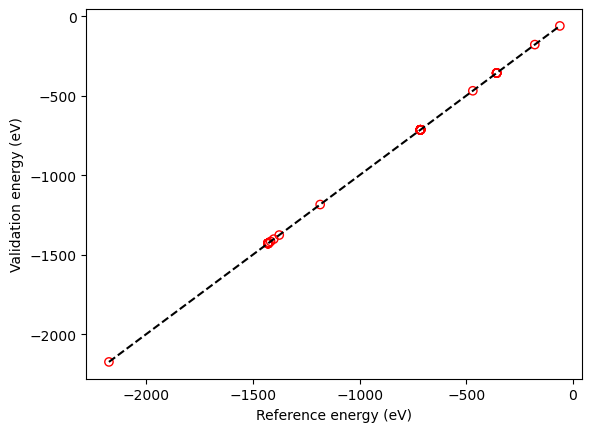

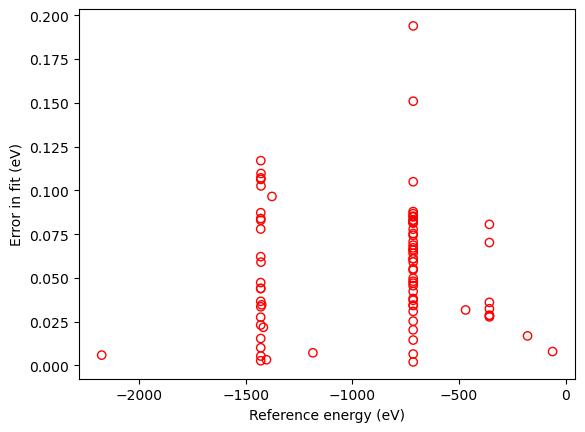

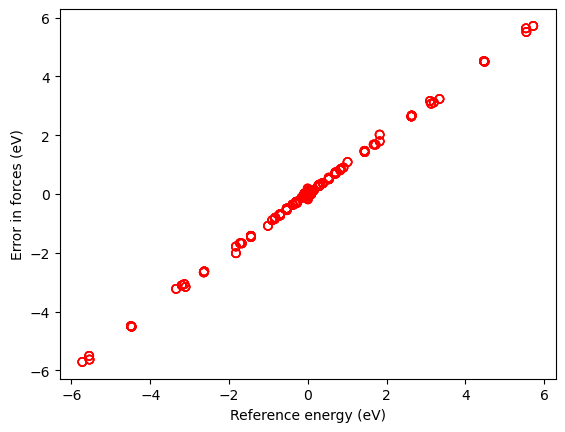

6141


In [12]:
import matplotlib.pyplot as plt
import numpy as np

try:
    err=np.loadtxt("CCS_validate.dat")
    plt.xlabel('Reference energy (eV)')
    plt.ylabel('Validation energy (eV)')
    plt.plot( [min(err[:,0]),max(err[:,0])],[min(err[:,0]),max(err[:,0])],'--',color='black'  )
    plt.scatter(err[:,0],err[:,1],facecolors='none', edgecolors='red')
    plt.show()
    plt.xlabel('Reference energy (eV)')
    plt.ylabel('Error in fit (eV)')
    plt.scatter(err[:,0],err[:,2],facecolors='none', edgecolors='red')
    plt.show()
    errf=np.loadtxt("CCS_error_forces.out")
    plt.xlabel('Reference energy (eV)')
    plt.ylabel('Error in forces (eV)')
    plt.scatter(errf[:,0],errf[:,1],facecolors='none', edgecolors='red')
    plt.show()
except:
    pass

print(len(errf))

## Test calculator for geometry optimisation

In [8]:
import os
import json
from ase import io
from ccs_fit.ase_calculator.ccs_ase_calculator import CCS
from ase.calculators.dftb import Dftb
from ase.calculators.mixing import LinearCombinationCalculator
from ase.optimize import FIRE

struct = io.read('DFT.db@-1')

with open('CCS_params.json', 'r') as f:
    CCS_params = json.load(f)

CCS_calc = CCS(CCS_params=CCS_params) 

calcs =[CCS_calc]
weights=[1]
calc=LinearCombinationCalculator(calcs, weights) 

# Geometry optimization
# import structure:
struct = io.read('DFT.db@-1')
print(struct)
struct.calc=calc
print(struct.calc)
relax = FIRE(struct, trajectory='opt.traj')
relax.run(fmax=0.01) 

Atoms(symbols='Cs8Pb8Br24', pbc=True, cell=[11.735352, 11.735352, 11.735352], calculator=SinglePointCalculator(...))
LinearCombinationCalculator(CCS)
      Step     Time          Energy         fmax
FIRE:    0 15:17:15    -1428.066817        0.5001
FIRE:    1 15:17:15    -1428.129996        0.4873
FIRE:    2 15:17:15    -1428.250591        0.4633
FIRE:    3 15:17:15    -1428.417912        0.4309
FIRE:    4 15:17:15    -1428.617785        0.3934
FIRE:    5 15:17:15    -1428.833689        0.3488
FIRE:    6 15:17:15    -1429.047400        0.2968
FIRE:    7 15:17:15    -1429.240890        0.2380
FIRE:    8 15:17:15    -1429.412083        0.1779
FIRE:    9 15:17:16    -1429.531536        0.1160
FIRE:   10 15:17:16    -1429.590791        0.0742
FIRE:   11 15:17:16    -1429.610395        0.0426
FIRE:   12 15:17:16    -1429.605784        0.0513
FIRE:   13 15:17:16    -1429.606059        0.0511
FIRE:   14 15:17:16    -1429.606608        0.0508
FIRE:   15 15:17:16    -1429.607427        0.0503
F

True

In [9]:
!ase -T gui opt.traj

Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/thism292/.local/lib/python3.10/site-packages/ase/gui/pipe.py", line 32, in <module>
    main()
  File "/home/thism292/.local/lib/python3.10/site-packages/ase/gui/pipe.py", line 19, in main
    make_plot(show=False, *data)
  File "/home/thism292/.local/lib/python3.10/site-packages/ase/gui/graphs.py", line 78, in make_plot
    plt.figure(figsize=(basesize * 2.5**0.5, basesize))
  File "/home/thism292/.local/lib/python3.10/site-packages/matplotlib/_api/deprecation.py", line 454, in wrapper
    return func(*args, **kwargs)
  File "/home/thism292/.local/lib/python3.10/site-packages/matplotlib/pyplot.py", line 783, in figure
    manager = new_figure_manager(
  File "/home/thism292/.local/lib/python3.10/site-packages/matplotlib/pyplot.py", 